# Spam dataset with ensemble methods

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.show()

In [2]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': [0,0,0,0,0,0,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


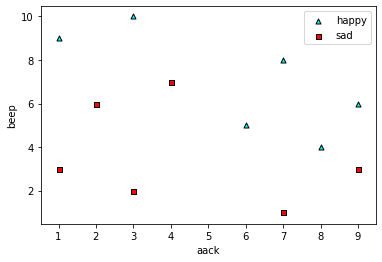

In [3]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']

plot_points(X, y)

In [4]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier()
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


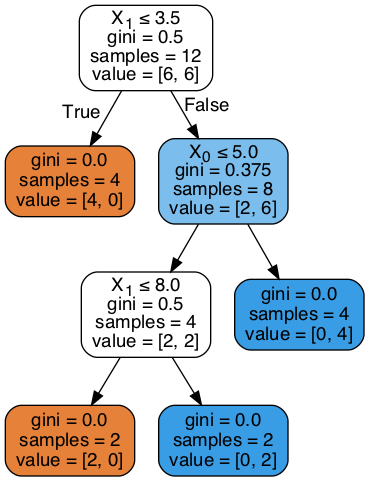

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

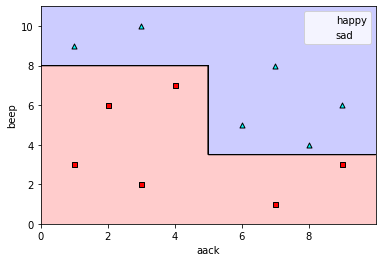

In [6]:
plot_model(X, y, spam_decision_tree)

# Now with a slightly modified dataset

In [35]:
new_spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9,8,2],
    'Sale':   [1,2,3,3,6,7,9,10,5,8,4,6,6,2],
    'Spam':   [0,0,0,0,0,0,1,1,1,1,1,1,0,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

#new_spam_dataset = pd.DataFrame({
#    'Lottery':[7,3,9,1,2,4,6,1,3,6,7,8,9,3],
#    'Sale':[1,2,3,3,6,7,8,9,10,5,8,4,6,4],
#    'Spam': [0,0,0,0,0,0,0,1,1,1,1,1,1,1]}) #'no','no','no','no','no','no','yes','yes','yes','yes','yes','yes'

new_spam_dataset

#new_spam_dataset = pd.DataFrame({
#    'Lottery':[7,3,9,1,2,4,8,1,3,6,7,8,9,2],
#    'Sale':[1,2,3,3,6,7,6,9,10,5,8,4,6,2],
#    'Spam': ['no','no','no','no','no','no','no','yes','yes','yes','yes','yes','yes','yes']})
#new_spam_dataset

,Lottery,Sale,Spam
0,7,1,0
1,3,2,0
2,9,3,0
3,1,3,0
4,2,6,0
5,4,7,0
6,1,9,1
7,3,10,1
8,6,5,1
9,7,8,1


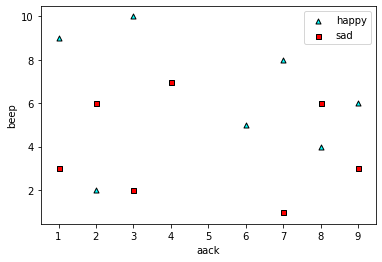

In [36]:
new_X = new_spam_dataset[['Lottery', 'Sale']]
new_y = new_spam_dataset['Spam']
plot_points(new_X, new_y)

In [37]:
new_spam_decision_tree = DecisionTreeClassifier()
new_spam_decision_tree.fit(new_X,new_y)
new_spam_decision_tree.score(new_X,new_y)

1.0

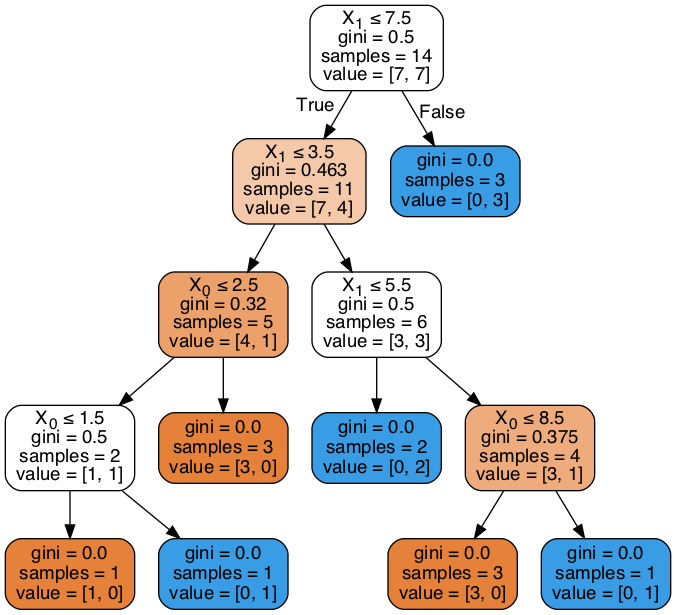

In [38]:
dot_data = StringIO()
export_graphviz(new_spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

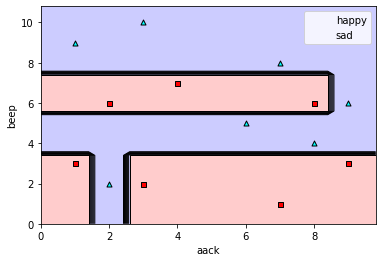

In [39]:
plot_model(new_X, new_y, new_spam_decision_tree)